
# <span style='color:Red'> Classification Model on Census Income dataset </span> 

Submitted by:- Ambarish Singh


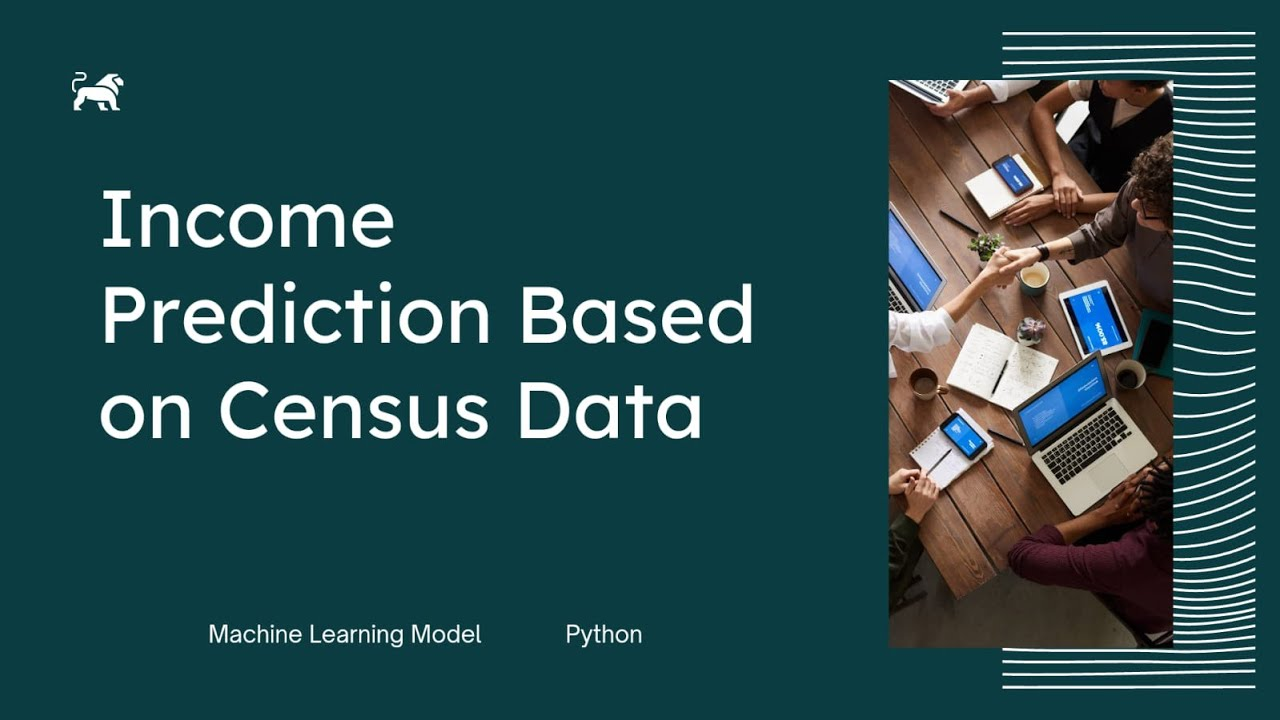

##  <span style='color: green'> Problem Statement </span>

- Predict Whether income of individual exceeds $50K/year or not based on attributes given

## <span style='color: green'> Task Performed:- </span>


1. Data Ingestion
2. Handle the null values
3. Replace column_name
4. Seperate categorical and Numerical Features
5. Univariate Analysis
6. Bivariate Analysis
7. Handle the outliers
8. Seperate Dependent and Independent features
9. Label encoding of categorical features
10. Test Accuracy using :
	- Decision Tree Classifier
	- Hyper-parameter tunning on Decision Tree 
	- Random Forest Classifier
	- Hyper-parameter tunning on Random Forest Classifier
	- Bagging Classifier using SVC
	- Random Forest Classifier
	- Voting Classifier using Logistic Regression , Random forest classifier, GuassianNB
	- Extra Tree Classifier
	- Hyper-parameter tunning on Extra Tree Classifier
11. Make final report showing accuracy of all models
12. Store the best model in pickle file

## <span style='color: green'> Attribute Information </span>


1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st 4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## <span style='color: green'> Description:-  </span>

As the problem of inequality of income has become very prominent over the years, governments of different countries have been trying to address the problem so as to improve the economic stability of a nation.

In this study, Machine Learning Classification techniques is used in order to predict whether a person's yearly income falls in the income category of either greater than 50K Dollars or less then equal to 50K Dollars category based on a certain set of attributes. An analysis of this kind helps to figure out which individual attributes are necessary in improving an individual's income so that focus can be put on those specific factors so as to level up the income of individuals.

In [1]:
## Comment
## Observations

## <span style='color: green'>  Import required libraries </span>


In [2]:
## Data Analysing
import pandas as pd
import numpy as np

## Graphical analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## for model building
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier



## <span style='color: green'> Data Ingestion </span>


In [3]:
## Loading Dataset
df= pd.read_csv(r"adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
## Checking Shapes of a Dataset
df.shape

(32561, 15)

## <span style='color: green'> Check how many class in income feature </span>


In [6]:
## Checking unique value in 'income' feature.
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

## <span style='color: green'> Convert classes in income feature to 0 and 1 </span>


In [7]:
## Converting Classes of Income Feature to 0 and 1.
df['income'] = df['income'].map({"<=50K": 0,">50K":1})

In [8]:
## Again Checking the unique Value of 'Income' Feature.
df['income'].unique()

array([0, 1], dtype=int64)

## <span style='color: green'> Check special symbols in data </span>


In [9]:
## Checking if any special symbols are present in a dataset or not.
df[df['workclass'] == "?"][:5]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,1
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,0
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,0


## <span style='color: green'> Replace special symbol with np.nan </span>


In [10]:
## Replacing Special Symbol with np.nan 
df.replace("?",np.NAN,inplace = True)

## <span style='color: green'> Checking the null values </span>


In [11]:
## Checking total null value present in a dataset
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## <span style='color: blue'> Note </span>

- If the feature is categorical feature then we have to use `bfill`
- `bfill` replaces NaN with forward & backward values

In [12]:
# replacing NaN with forward & backward values
df['workclass'] = df['workclass'].fillna(method = 'bfill')
df['occupation'] = df['occupation'].fillna(method = 'bfill')
df['native.country'] = df['native.country'].fillna(method = 'pad')

## <span style='color: green'>  Checking the null values again </span>


In [13]:
## Again Checking total null value present in a dataset or not.
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## <span style='color: blue'> Observation </span>

- Now, here is No Null Value present

## <span style='color: green'> Replace columns names </span>


In [14]:
## Replacing Column name for better understanding.
df.rename(columns= {
    'education.num' : "education_num",
    "marital.status" : "marital_status",
    "capital.gain" : "capital_gain",
    "capital.loss" : "capital_loss",
    "hours.per.week" : "hours_per_week",
    "native.country" : "native_country"
},inplace= True)


In [15]:
## Checking All Columns name present in a dataset.
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

## <span style='color: green'> Seperate categorical and numerical features </span>


In [16]:
## Seperate categorical and numerical features from a dataset.
categorical_fea = [col for col in df.columns if df[col].dtype == object]
numerical_fea = [col for col in df.columns if df[col].dtype != object]

In [17]:
## Checking all Categorical Features present in a dataset
categorical_fea

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [18]:
## ## Checking all Numerical Features present in a dataset 
numerical_fea

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income']

## <span style='color: green'> Univariate Analysis </span>


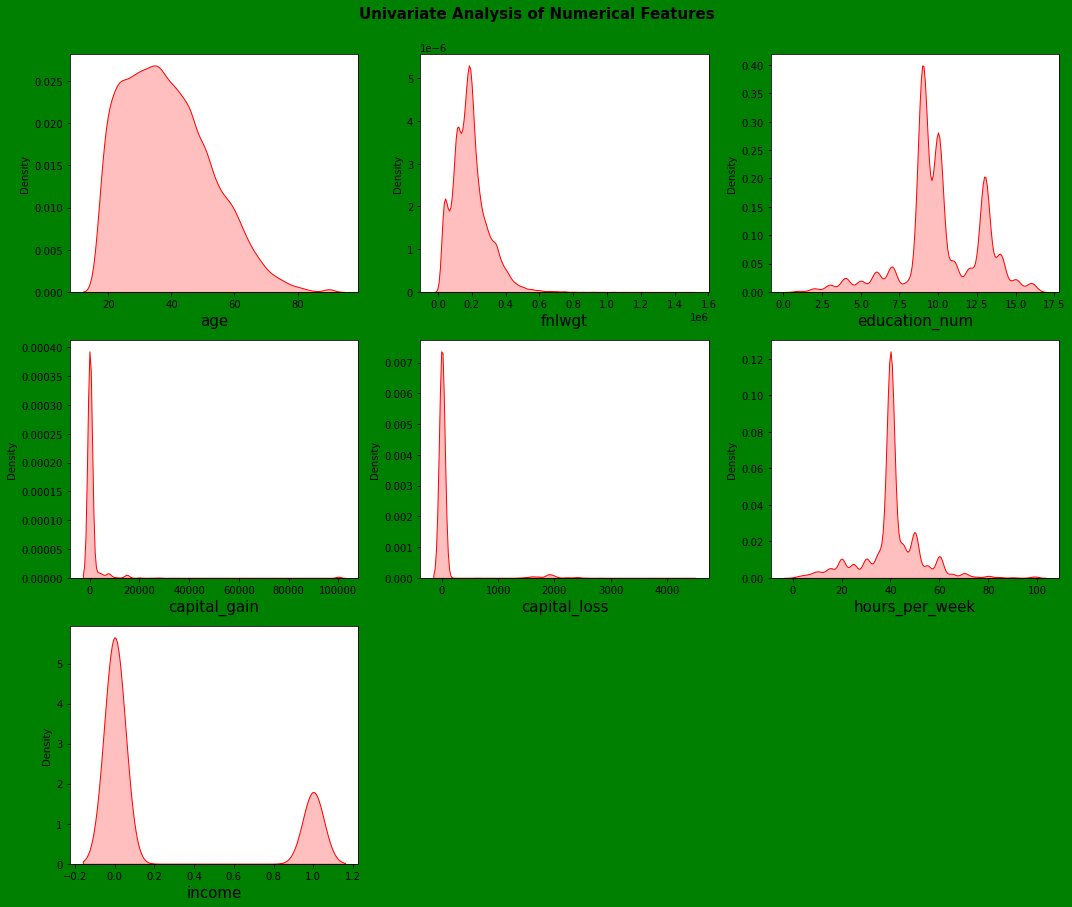

In [19]:
## Ploting Univariate Analysis of Numerical Features:-
plt.figure(figsize=(15,20), facecolor='green')
plt.suptitle('Univariate Analysis of Numerical Features',fontweight = "bold",fontsize=15,y = 1)
for i in range(0, len(numerical_fea)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_fea[i]],shade = True, color='r',data=df) 
    plt.xlabel(numerical_fea[i],fontsize = 15)
    plt.tight_layout()

## <span style='color: blue'> Observations </span>

- Age is aprroximately normally distributed.
- Final weight,capital loss & capital gain are heavily right skewed.


## <span style='color: green'> Bivariate Analysis </span>


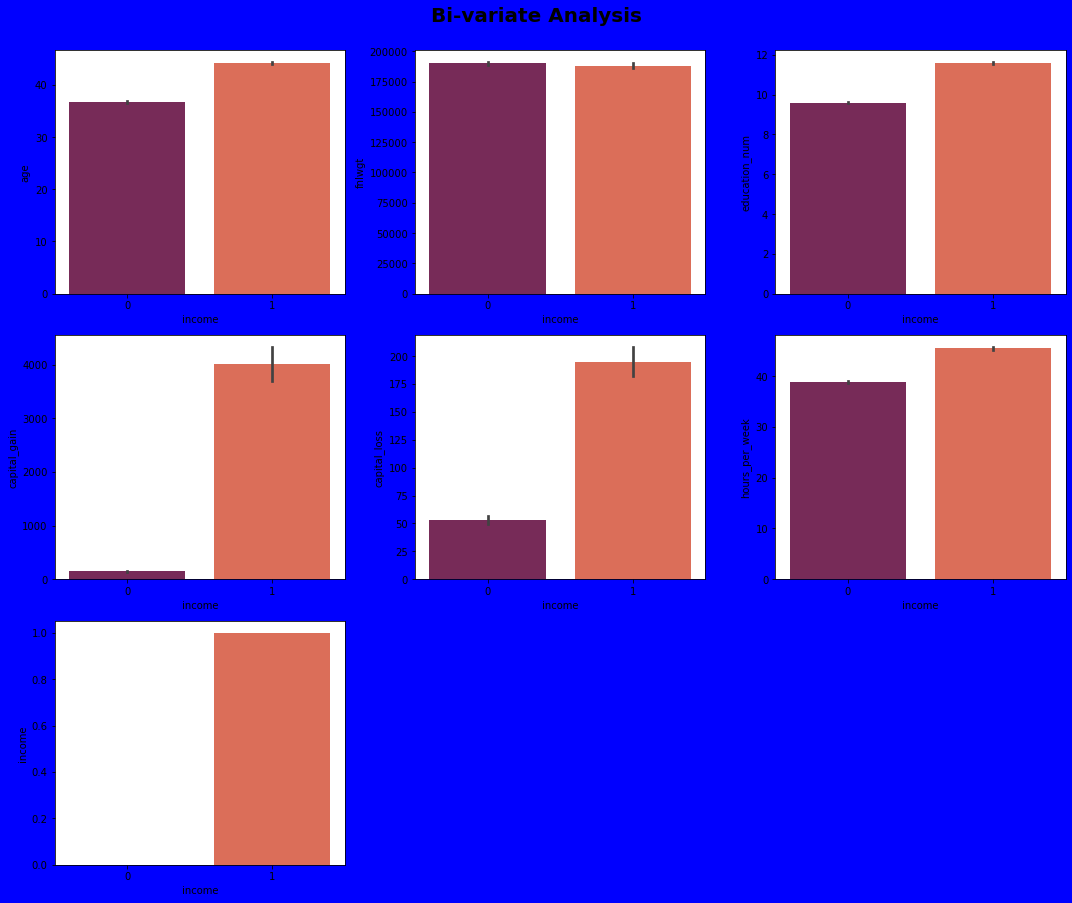

In [20]:
## Ploting Bi-variate Analysis w.r.t Target column as 'income'

plt.figure(figsize=(15,20), facecolor='blue')
plt.suptitle('Bi-variate Analysis', fontsize=20, fontweight='bold', alpha=1, y=1)
for i in range(0, len(numerical_fea)):
    plt.subplot(5, 3, i+1) 
    sns.barplot(y=numerical_fea [i], x='income', data = df,palette ="rocket") 
    plt.tight_layout()

## <span style='color: green'> Check distribution and outliers together </span>

- Plot 2 Graphs Together

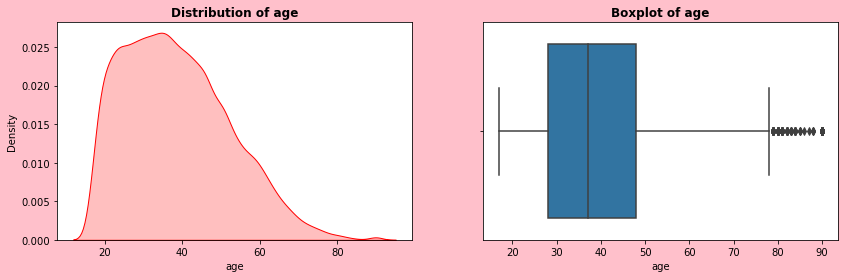

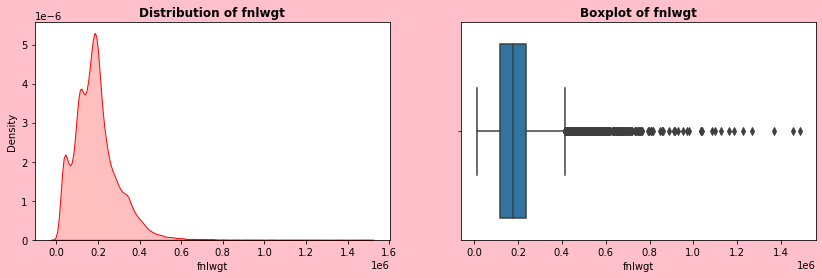

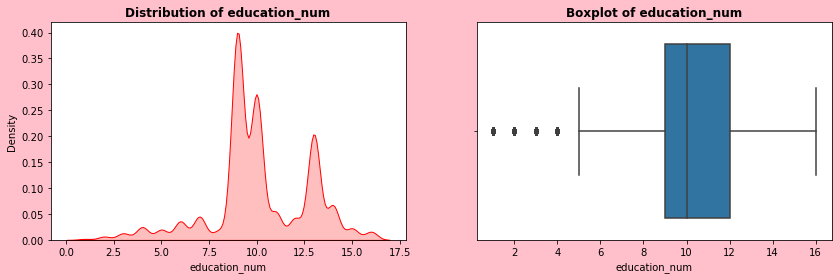

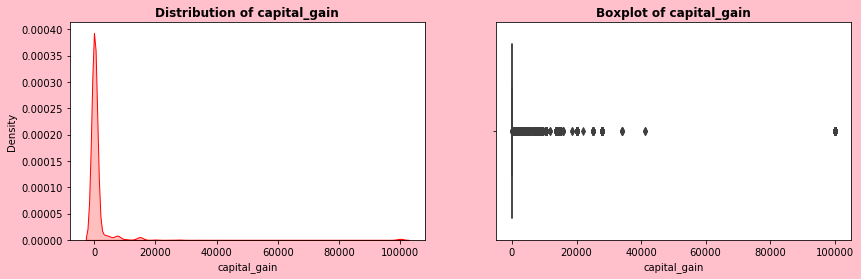

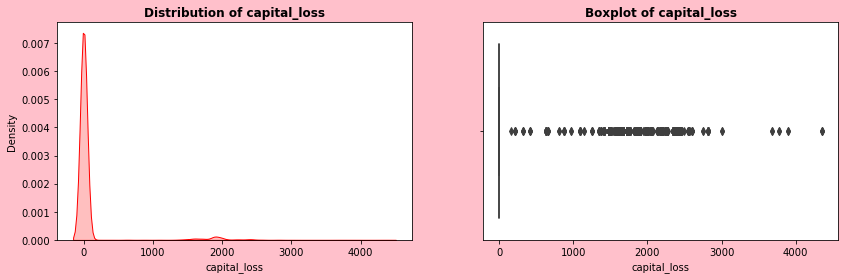

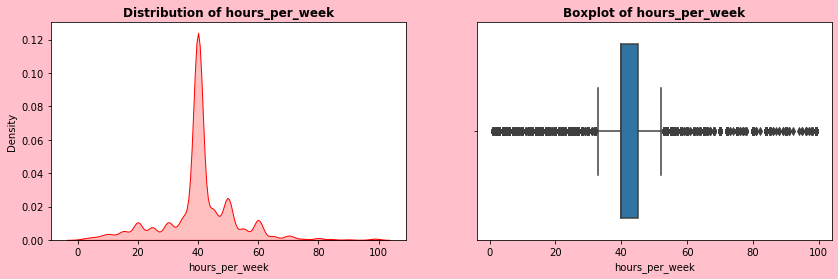

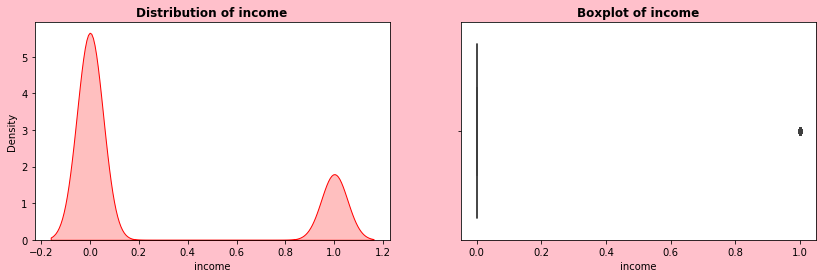

In [21]:
## Ploting two graphs for checking Distribution and Outlier Togrther.
for fea in numerical_fea:
    plt.figure(figsize = (14,4), facecolor='pink')
    plt.subplot(121)
    sns.kdeplot(x=df[fea],shade = True, color='r',data=df) 
    plt.title("Distribution of {}".format(fea),fontweight = 'bold' )
    
    plt.subplot(122)
    sns.boxplot(x= fea,data = df[numerical_fea]) 
    plt.title("Boxplot of {}".format(fea),fontweight = 'bold' )
    plt.show()

## <span style='color: green'> Handling the outliers </span>


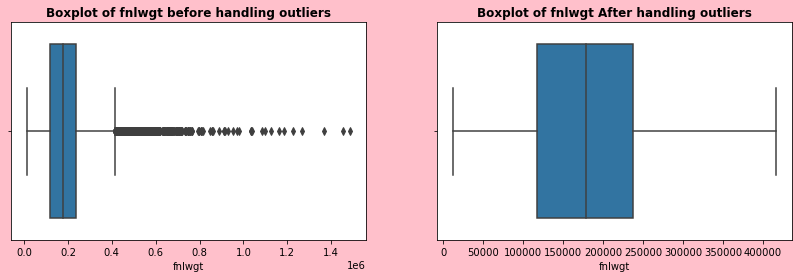

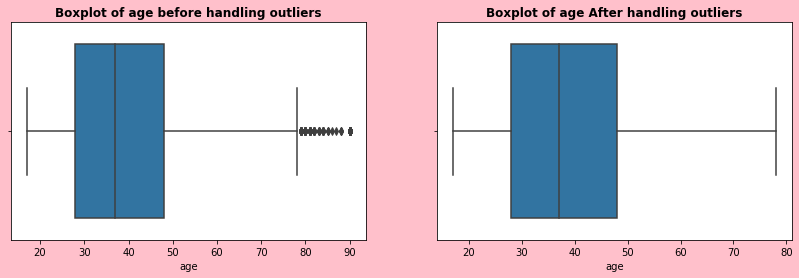

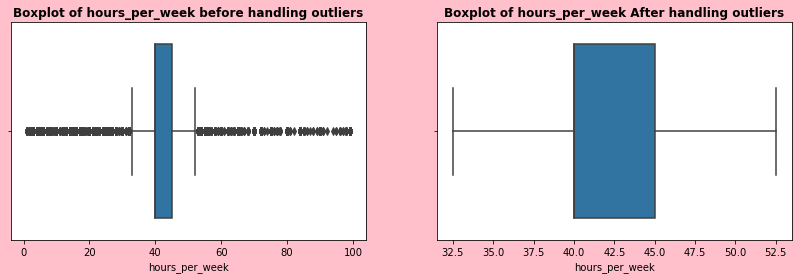

In [22]:
## Handling the outliers

df1 = df.copy()
feature_to_use = ["fnlwgt",'age','hours_per_week']

for i in range(len(feature_to_use)):
    IQR = df1[feature_to_use[i]].quantile(0.75) - df1[feature_to_use[i]].quantile(0.25)
    Lower_Limit = df1[feature_to_use[i]].quantile(0.25) - (1.5*IQR)
    UPPER_LIMIT = df1[feature_to_use[i]].quantile(0.75) + (1.5*IQR)
    df1[feature_to_use[i]]= np.where(df1[feature_to_use[i]]>UPPER_LIMIT,UPPER_LIMIT,
                                np.where(df1[feature_to_use[i]]<Lower_Limit,Lower_Limit,df1[feature_to_use[i]]))


for fea in feature_to_use:
    plt.figure(figsize = (14,4), facecolor='pink')
    plt.subplot(121)
    sns.boxplot(x = fea, data = df)
    plt.title("Boxplot of {} before handling outliers".format(fea),fontweight = 'bold')

    plt.subplot(122)
    sns.boxplot(x = fea, data = df1)
    plt.title("Boxplot of {} After handling outliers".format(fea),fontweight = 'bold')
    plt.show()

## <span style='color: green'> Seperate independent and dependent Feature </span>


In [23]:
## Creating Independent and Dependent Feature from dataset
x = df1.drop('income', axis = 1)
y = df1['income']

In [24]:
## Checking top 5 Rows of a dataset
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,78.0,Private,77053.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40.0,United-States
1,78.0,Private,132870.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States
2,66.0,Private,186061.0,Some-college,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,4356,40.0,United-States
3,54.0,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States
4,41.0,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States


In [25]:
## Checking all Target_y value from dataset
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [26]:
## Checking shapes of both x and y value.
x.shape , y.shape 

((32561, 14), (32561,))

## <span style='color: blue'>  Label encoding on the categorical features </span>

- If the data of feature is continous or discrete (numbers) then we dont have to do anything and we can directly standardize and train the model
- But when the data is categorical (string) then we have to perform encoding, it means convert it to 0 or 1, then only we can train the model

In [27]:
## Importing labelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [28]:
## Fitting label Encoding in all categorical Feature.
x[categorical_fea] = x[categorical_fea].apply(LabelEncoder().fit_transform)

In [29]:
## cheking top 5 rows of dataset.
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,78.0,3,77053.0,11,9,6,3,1,4,0,0,4356,40.0,38
1,78.0,3,132870.0,11,9,6,3,1,4,0,0,4356,32.5,38
2,66.0,3,186061.0,15,10,6,6,4,2,0,0,4356,40.0,38
3,54.0,3,140359.0,5,4,0,6,4,4,0,0,3900,40.0,38
4,41.0,3,264663.0,15,10,5,9,3,4,0,0,3900,40.0,38


In [30]:
## Checking top 5 rows of dataset.
y .head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

## <span style='color: green'>  Train-Test Split </span>

In [31]:
## Importing Train_test_Split and GridSearchCV library
from sklearn.model_selection import train_test_split,GridSearchCV
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=10)

In [32]:
## Checking both shapes of x and y training dataset
x_train.shape,y_train.shape

((21815, 14), (21815,))

In [33]:
## Checking both shapes of x and y training dataset
x_test.shape,y_test.shape

((10746, 14), (10746,))

# <span style='color: red'> MODEL Building </span>


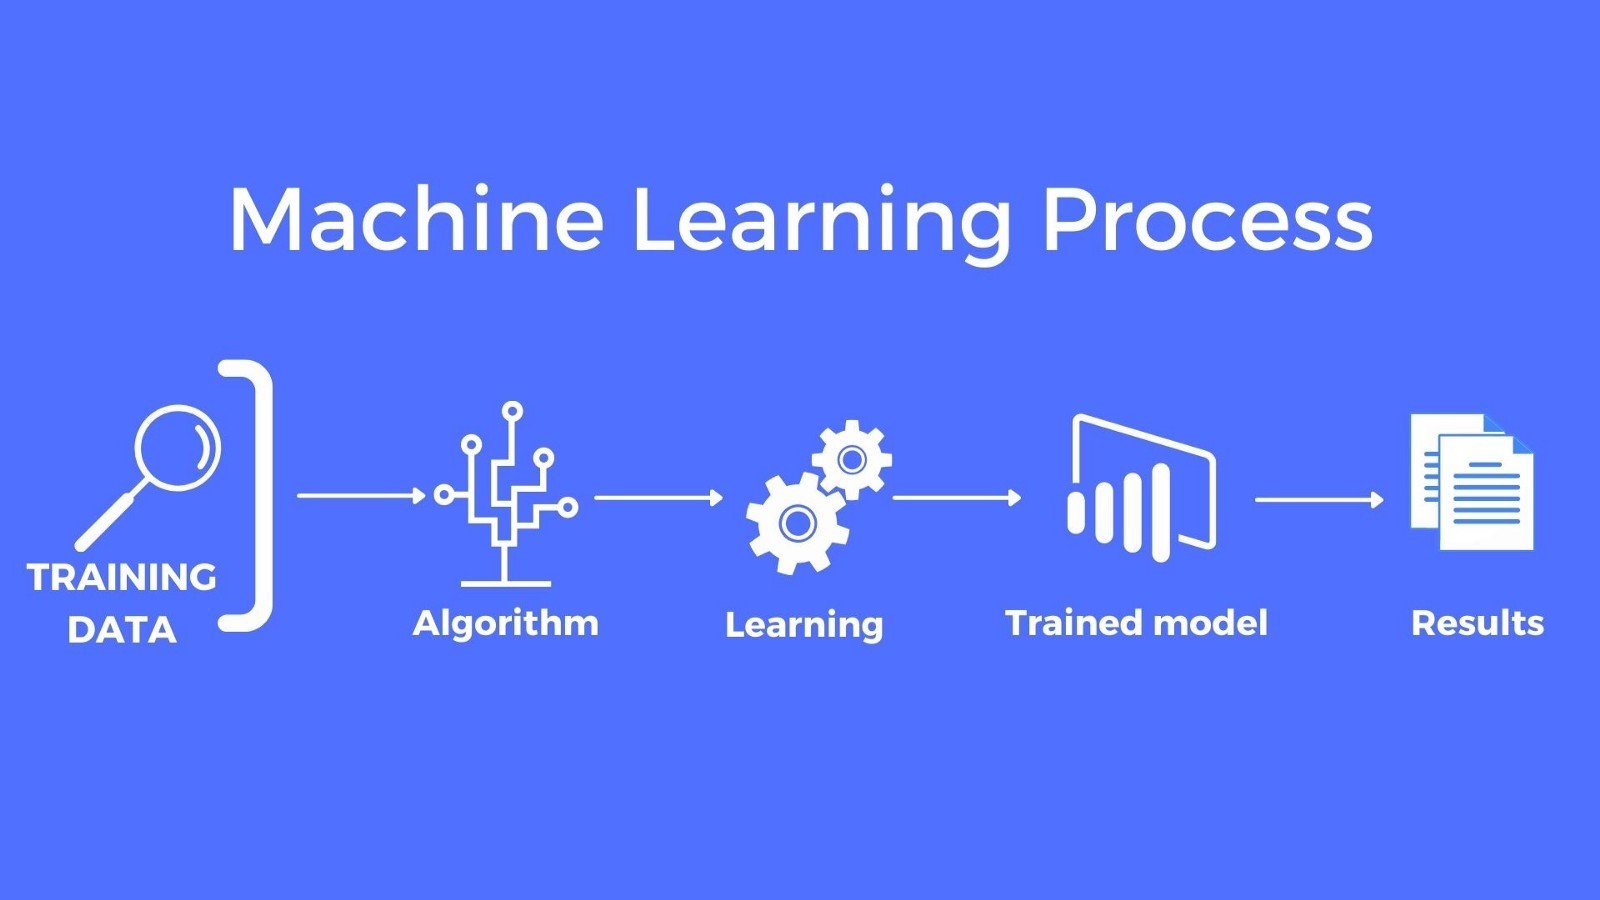

## <span style='color: green'> Decision Tree </span>


In [34]:
report = []

In [35]:
## Importing Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [36]:
## fitting of Decision TRee Classifier model for Training dataset
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
## checking Model score for Decision_TRee_Classifier model for Testing dataset
model.score(x_test,y_test)

0.811930020472734

In [38]:
## Model_Prediction for decision_tree_classifier.
dt_pred = model.predict(x_test)

In [41]:
## Importing accuracy_score library
from sklearn.metrics import accuracy_score
d_acc = accuracy_score(y_test,dt_pred)
report.append(['Decision Tree',d_acc])
d_acc

0.811930020472734

## <span style='color: green'> Hyperparameter Tunning of decision Tree with GridSearchCV </span>


In [42]:
## Selecting Hyperparameter Tuninng for gridSearchCV
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter':['best','random']
}

In [43]:
dt_grid=GridSearchCV(estimator=model, param_grid= grid_param, cv = 3, n_jobs = -1)

In [45]:
## Fitting decision_tree_classifier Model in training dataset
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [46]:
## choosing best Hyperparameter Tuining for Decision_Tree_Classifier.
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 9,
 'min_samples_split': 8,
 'splitter': 'best'}

In [47]:
## Applyinng best Hyperparameter for Decision_tree_Classifier
dt_best_para = DecisionTreeClassifier(criterion = "entropy",
                                      max_depth= 8 , 
                                      min_samples_leaf= 3,
                                      min_samples_split= 2 ,
                                      splitter= "best")

In [48]:
## Fitting best Hyperparameter for Decision_tree_Classifier
dt_best_para.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3)

In [49]:
## Prediction
dt_best_para_pred2 = dt_best_para.predict(x_test)

In [50]:
print("Accuracy Before Hyper-parameter tunning:",accuracy_score(y_test,dt_pred))
print("Accuracy after Hyper-parameter tunning:",accuracy_score(y_test,dt_best_para_pred2))

Accuracy Before Hyper-parameter tunning: 0.811930020472734
Accuracy after Hyper-parameter tunning: 0.8535268937278988


In [51]:
hd_acc = accuracy_score(y_test,dt_best_para_pred2)
report.append(['Decision Tree Hyperparameter tunned',hd_acc])

## <span style='color: green'> Random Forest Classifier </span>


In [52]:
## Importing RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [53]:
## Fitting RandomForestClassifier model in training dataset 
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
## Prediction
y_pred_rf = rf_model.predict(x_test)

In [55]:
# Before Hyper-parameter tunning
rf_acc = accuracy_score(y_test,y_pred_rf)
report.append(['Random Forest',rf_acc])
accuracy_score(y_test,y_pred_rf)

0.8566908617159873

## <span style='color: green'>  Hyperparameter Tunning of Random Forest Classifier with RandomizedSearchCV </span>


In [56]:
Ran_param = {
    "max_depth" : [5,8,15,None,10],
    'max_features' : [3,'auto'],
    'min_samples_split' : [2,8,15,20],
    'n_estimators' : [50,100,200,500]
}

In [57]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = RandomForestClassifier(),
                   param_distributions = Ran_param,
                   n_iter= 100,
                   cv = 3,
                   verbose = 2,
                   n_jobs=-1)

In [58]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [3, 'auto'],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

In [60]:
random.best_params_,random.best_estimator_

({'n_estimators': 500,
  'min_samples_split': 8,
  'max_features': 3,
  'max_depth': 15},
 RandomForestClassifier(max_depth=15, max_features=3, min_samples_split=8,
                        n_estimators=500))

In [61]:
random.best_params =  RandomForestClassifier(max_depth= None, max_features=3 , min_samples_split=15,
                        n_estimators=50)

In [62]:
random.best_params.fit(x_train,y_train)

RandomForestClassifier(max_features=3, min_samples_split=15, n_estimators=50)

In [63]:
y_pred_rf_bestpara = random.best_params.predict(x_test)

In [64]:
print("Accuracy Before Hyper-parameter tunning:",accuracy_score(y_test,dt_pred))
print("Accuracy after Hyper-parameter tunning:",accuracy_score(y_test,dt_best_para_pred2))

Accuracy Before Hyper-parameter tunning: 0.811930020472734
Accuracy after Hyper-parameter tunning: 0.8535268937278988


In [95]:
hd_acc = accuracy_score(y_test,y_pred_rf_bestpara)
report.append(['Random Forest Hypertunned',hd_acc])
accuracy_score(y_test,y_pred_rf_bestpara)

0.8606923506420994

## <span style='color: green'> Bagging Classifier using SVC </span>


In [66]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bag_svc = BaggingClassifier(base_estimator=SVC(), n_estimators = 50, random_state=0)

In [67]:
model_bag_svc.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0)

In [88]:
y_pred_bag = model_bag_svc.predict(x_test)

In [89]:
bg_acc = accuracy_score(y_test, y_pred_bag)
report.append(['Bagging Classifier using SVC',bg_acc])
accuracy_score(y_test, y_pred_bag)

0.7949934859482598

## <span style='color: green'> Voting Classifier </span>


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(multi_class= 'multinomial',random_state=1)
clf2 =RandomForestClassifier(n_estimators= 50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators= [('lr',clf1),('rf',clf2),('gnb',clf3)], voting = 'hard', n_jobs=-1)

In [73]:
eclf1.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('gnb', GaussianNB())],
                 n_jobs=-1)

In [74]:
y_pred_votting = eclf1.predict(x_test)

In [75]:
vc_acc = accuracy_score(y_test,y_pred_votting)
report.append(['Voting Classifier',vc_acc])
accuracy_score(y_test,y_pred_votting)

0.8106272101246975

## <span style='color: green'> Extra Tree Classifier </span>


In [76]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier()

In [77]:
et_model.fit(x_train,y_train)

ExtraTreesClassifier()

In [78]:
y_pred_et = et_model.predict(x_test)

In [79]:
et_acc = accuracy_score(y_test,y_pred_et)
report.append(['Extra Trees Classifier', et_acc])
accuracy_score(y_test,y_pred_et)

0.8417085427135679

## <span style='color: green'> Hyperparameter tunning of ET_model by RandomSearchCV </span>


In [80]:
Ran_param = {
    "max_depth" : [5,8,15,None,10],
    'max_features' : [3,'auto'],
    'min_samples_split' : [2,8,15,20],
    'n_estimators' : [50,100,200,500]
}

In [81]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = et_model,
                   param_distributions = Ran_param,
                   n_iter= 100,
                   cv = 3,
                   verbose = 2,
                   n_jobs=-1)

In [82]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [3, 'auto'],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

In [83]:
random.best_params_,random.best_estimator_

({'n_estimators': 500,
  'min_samples_split': 15,
  'max_features': 3,
  'max_depth': None},
 ExtraTreesClassifier(max_features=3, min_samples_split=15, n_estimators=500))

In [84]:
et_best_para =  ExtraTreesClassifier(max_depth= None, max_features= 3 , min_samples_split=15,
                        n_estimators=500)

In [85]:
et_best_para.fit(x_train,y_train)

ExtraTreesClassifier(max_features=3, min_samples_split=15, n_estimators=500)

In [86]:
y_pred_et = et_best_para.predict(x_test)

In [87]:
et_acc_ht = accuracy_score(y_test,y_pred_et)
report.append(['Extra Tress Classifier Hypertuned', et_acc_ht])
accuracy_score(y_test,y_pred_et)

0.8563186301879769

In [96]:
report

[['Decision Tree', 0.811930020472734],
 ['Decision Tree', 0.811930020472734],
 ['Decision Tree Hyperparameter tunned', 0.8535268937278988],
 ['Random Forest', 0.8566908617159873],
 ['Random Forest Hypertunned', 0.8535268937278988],
 ['Voting Classifier', 0.8106272101246975],
 ['Extra Trees Classifier', 0.8417085427135679],
 ['Extra Tress Classifier Hypertuned', 0.8563186301879769],
 ['Bagging Classifier using SVC', 0.7949934859482598],
 ['Random Forest Hypertunned', 0.8606923506420994]]

In [97]:
i_report = pd.DataFrame(report, columns = ['Classifier','Accuracy'])

In [98]:
i_report.sort_values(by = "Accuracy",ascending = False)

,Classifier,Accuracy
9,Random Forest Hypertunned,0.860692
3,Random Forest,0.856691
7,Extra Tress Classifier Hypertuned,0.856319
2,Decision Tree Hyperparameter tunned,0.853527
4,Random Forest Hypertunned,0.853527
6,Extra Trees Classifier,0.841709
0,Decision Tree,0.811930
1,Decision Tree,0.811930
5,Voting Classifier,0.810627
8,Bagging Classifier using SVC,0.794993


## <span style='color: blue'> Summary </span>

- Random Forest Hypertunned gives the best accuracy

## <span style='color: green'>  Store the Best model (Random Forest Hypertunned) in a pickle file </span>


In [101]:
import pickle
pickle.dump(y_pred_rf_bestpara, open('randomforest_hupertuned.sav','wb'))

# <span style='color: red'> THANK YOU </span>
